In [236]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

## Пути к директориям и файлам

In [237]:
dataset_path = pd.read_csv("train.csv")
prep_dataset_path = pd.read_csv("test.csv")

## Описание данных

#####    Home Ownership - домовладение
#####    Annual Income - годовой доход
#####    Years in current job - количество лет на текущем месте работы
#####    Tax Liens - налоговые обременения
#####    Number of Open Accounts - количество открытых счетов
#####    Years of Credit History - количество лет кредитной истории
#####    Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
#####    Number of Credit Problems - количество проблем с кредитом
#####    Months since last delinquent - количество месяцев с последней просрочки платежа
#####    Bankruptcies - банкротства
#####    Purpose - цель кредита
#####    Term - срок кредита
#####    Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
#####    Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
#####    Monthly Debt - ежемесячный долг
#####    Credit Score - баллы кредитного рейтинга
#####    Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)


## Приведение типов

In [238]:
# for colname in ["Home Ownership", "Years in current job", "Purpose", "Term"]:
#     df[colname] = df[colname].astype(str)


# пока-что не вижу признаки, которые можно было перевести к другому типу данных

In [239]:
df = dataset_path
df.shape

(7500, 17)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Обзор данных

### Обзор целевой переменной

In [241]:
df["Credit Default"].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

### Обзор количественных признаков

In [242]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


наблюдаются аномалии в следующих признаках:

- Tax Liens (при этом mean == quantile 0.5) ?????
- Number of Open Accounts (при этом mean == quantile 0.5) ?????
- Years of Credit History (при этом mean == quantile 0.5)  возраст должен быть около 70-80 лет?
- Maximum Open Credit
- Months since last Delinquent (при этом mean == quantile 0.5) ?????
- Number of Credit Problems (при этом mean == quantile 0.5)  ?????
- Bankruptcies (при этом mean == quantile 0.5)
- Current Loan Amount
- Credit Score (max)


### Обзор номинативных признаков

- Home Ownership - домовладение
- Years in current job - количество лет на текущем месте работы
- Purpose - цель кредита
- Term - срок кредита

In [243]:
for cat_colname in df.select_dtypes(include="object").columns:
    print(f'{cat_colname}' + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

- изучить объединение в Home Ownership;
- изучить объединение в Purpose;
- изучить объединение в Years in Current job;

## Обработка данных

In [244]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

отсутствует часть данных в:
    
    - Annual income;
    - Years in current job;
    - Month since last delinquent;
    - Bankruptcies;
    - Credit Score

### Заполнение пропусков

**Annual Income**

In [245]:
df.loc[df["Annual Income"].isna(), "Annual Income"] = df["Annual Income"].median() # замена пропусков годового дохода на медиану
df["Annual Income"].isna().sum()

0

**Years in current job**

In [246]:
df.loc[df["Years in current job"].isna(), "Years in current job"] = df["Years in current job"].mode()[0]
df["Years in current job"].isna().sum()

0

**Months since last delinquent**

In [247]:
df.loc[df["Months since last delinquent"].isna(), "Months since last delinquent"] = df["Months since last delinquent"].median()
df["Months since last delinquent"].isna().sum()

0

**Bankruptcies**

In [248]:
df.loc[df["Bankruptcies"].isna(), "Bankruptcies"] = df["Bankruptcies"].median()
df["Bankruptcies"].isna().sum()

0

**Credit Score**

In [249]:
df.loc[df["Credit Score"].isna(), "Credit Score"] = df["Credit Score"].median()

*Проверка заполененности*

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Обработка выбросов

In [251]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,33.227467,0.116933,1.187318e+07,2.898332e+05,18314.454133,1063.877333,0.281733
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,14.703950,0.346904,3.192612e+07,3.178714e+05,11926.764673,1438.335832,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,32.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,718.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,32.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


**Maximum Open Credit**

<AxesSubplot:xlabel='Maximum Open Credit'>

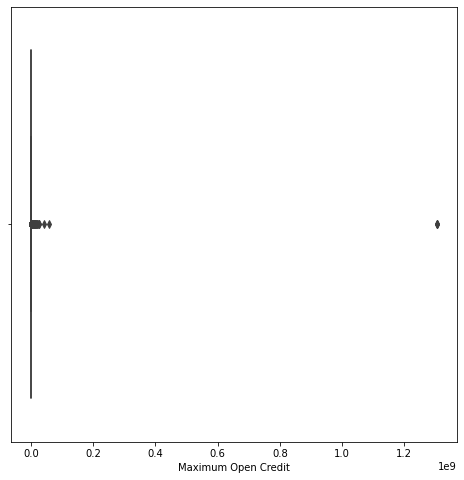

In [360]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,
           x="Maximum Open Credit")

In [366]:
df.loc[df["Maximum Open Credit"] > 2 * 10 ** 8, "Maximum Open Credit"] = df["Maximum Open Credit"].quantile(0.99)

In [367]:
(df["Maximum Open Credit"] > 2 * 10 ** 8).sum()

0

<AxesSubplot:xlabel='Maximum Open Credit'>

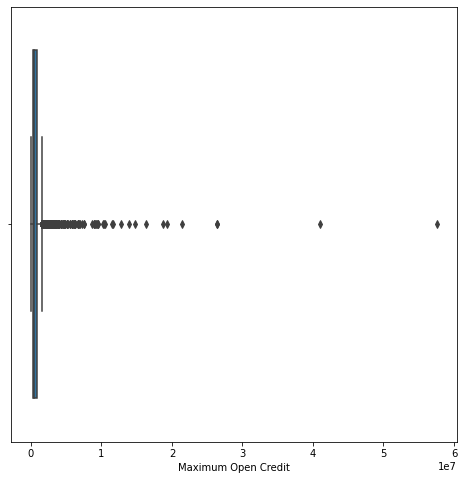

In [368]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df,
           x="Maximum Open Credit")

**Current Loan Amount**

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

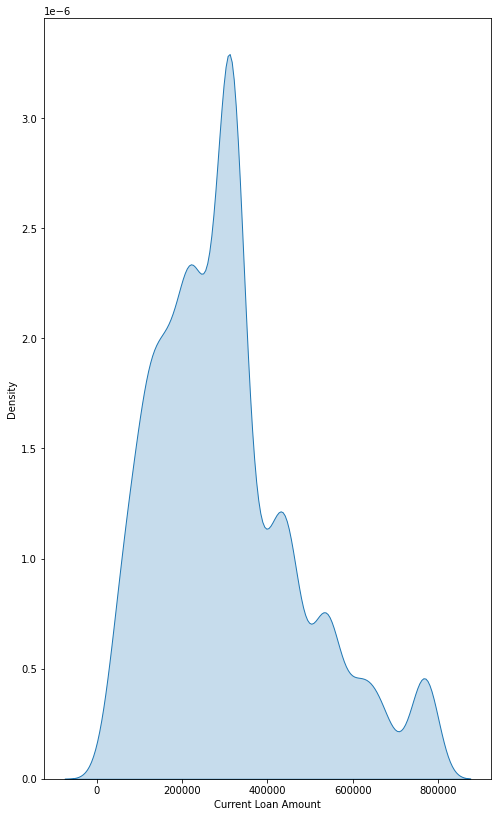

In [369]:
plt.figure(figsize=(8, 14))
sns.kdeplot(x=df["Current Loan Amount"], shade=True)

In [370]:
df.loc[df["Current Loan Amount"] > 0.2 * 10 ** 8, "Current Loan Amount"] = df["Current Loan Amount"].median()

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

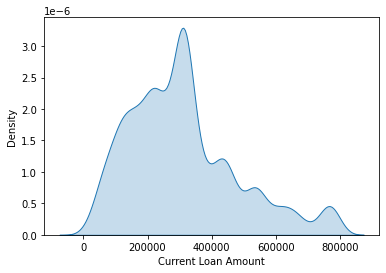

In [371]:
sns.kdeplot(data=df["Current Loan Amount"], shade=True)

**Credit Score**

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

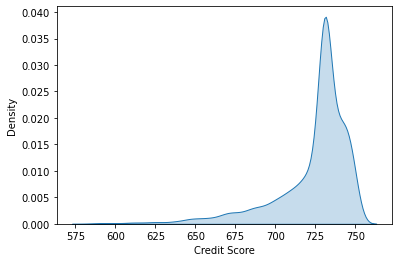

In [372]:
sns.kdeplot(x=df["Credit Score"], shade=True)

In [373]:
df.loc[df["Credit Score"] > 1500, "Credit Score"] = df["Credit Score"].median()

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

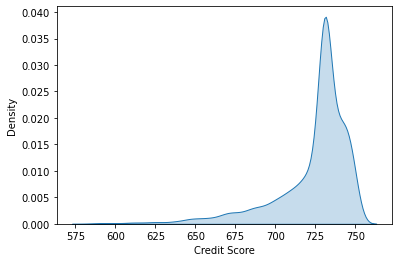

In [374]:
sns.kdeplot(x=df["Credit Score"], shade=True)

### Построение новых признаков